In [2]:
import numpy as np
import matplotlib.pyplot as plt
import lightbeam
from lightbeam import screen

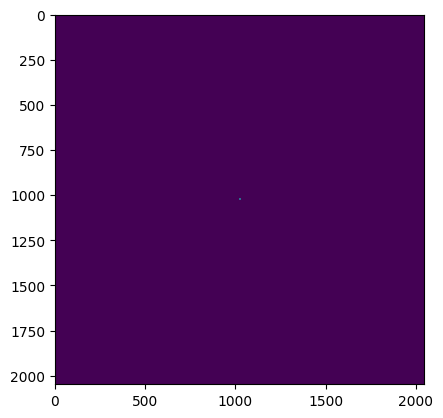

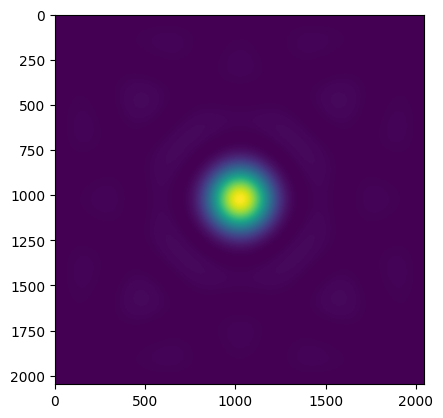

In [14]:
# from Srinath et al. (2015) 28 Dec 2015 | Vol. 23, No. 26 | DOI:10.1364/OE.23.033335 | OPTICS EXPRESS 33335
# class PhaseScreenGenerator(object):
    # def __init__(self, D, p, vy, vx, T, r0, wl0, wl, rs=None, seed=None, alpha_mag=1.,filter_func = None,filter_scale=None):

n = 2048
scrnSize = 200 # [m]
D = 0.7 # [m]  telescope diameter
p = n/scrnSize # [pix/m] sampling scale

f = 8.41
wl = 1550e-9


D_pix = D * p 

xa,ya = np.linspace(-scrnSize/2,scrnSize/2,n), np.linspace(-scrnSize/2,scrnSize/2,n)
xg,yg = np.meshgrid(xa,ya)

# E = np.zeros_like(xg)

mask = (xg**2+yg**2<(D/2)**2)
E = mask*np.ones_like(E,dtype="complex128")
plt.imshow(np.abs(E)**2)
plt.show()


def F(E):
    return np.fft.fftshift(np.fft.fft2(E))

E2 = E/(1j*wl*f)*F(E)

plt.imshow(np.abs(F(E))**2)
plt.show()

In [34]:
# set wind parameters
vy, vx = 0., 10. # [m/s] wind velocity vector
T = 0.01 # [s]  sampling interval

# set turbulence parameters
r0  = 0.15 # [m]
wl0 = 1.550 #[um]
wl  = 1 #[um]

psgen = screen.PhaseScreenGenerator(D, p, vy, vx, T, r0, wl0, wl)

A = psgen.generate()


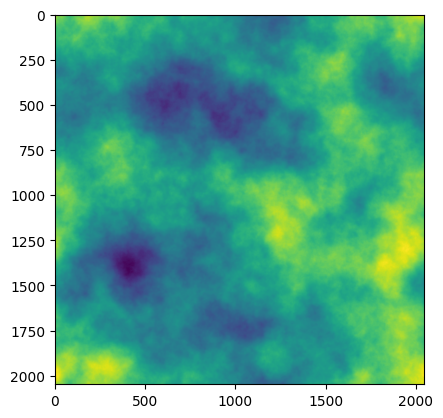

In [35]:
plt.imshow(A)

In [36]:
import lightbeam.LPmodes as LPmodes
from lightbeam.misc import normalize


In [37]:
xa = ya = np.linspace(-5,5,n)
xg,yg = np.meshgrid(xa,ya)
rcore = 3 #um
ncore = 1.4504 + 0.0088
nclad = 1.4504

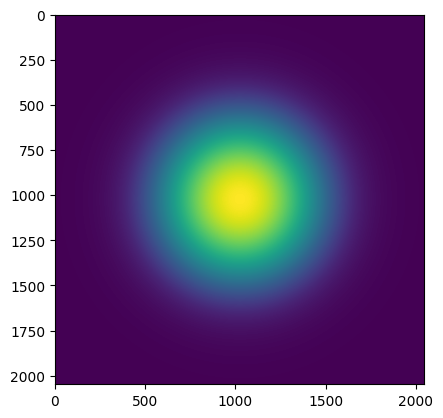

In [38]:

u0 = normalize(LPmodes.lpfield(xg,yg,0,1,rcore,wl,ncore,nclad))
plt.imshow(np.abs(u0)**2)

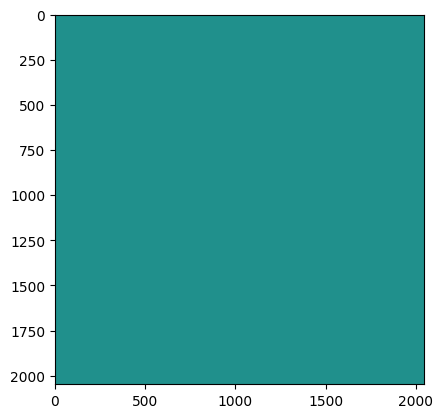

In [39]:
phase = np.exp(1j*A)

plt.imshow(np.abs(phase))

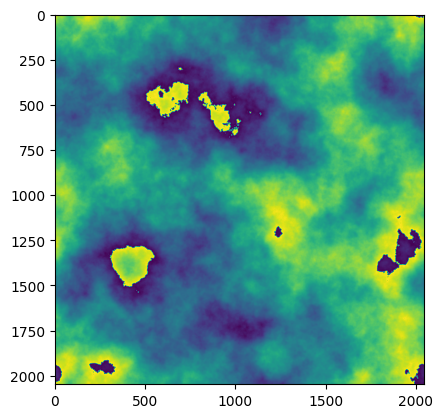

In [40]:
plt.imshow(np.angle(phase))

U1: Shape:(2048, 2048)


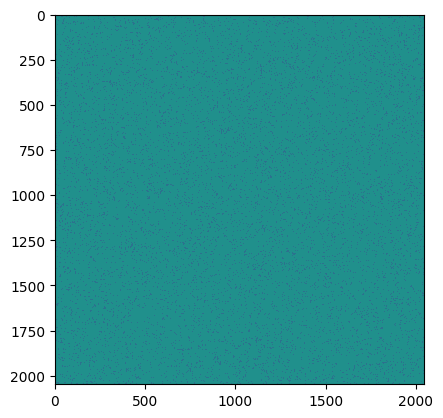

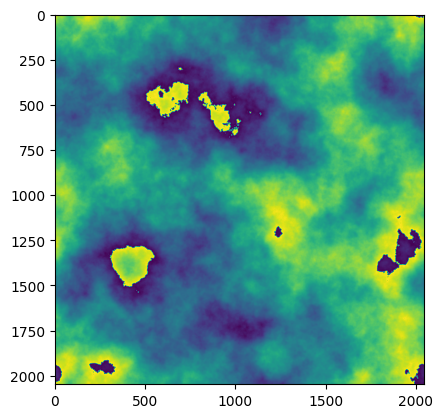

In [41]:
import numpy as np

A = np.ones_like(u0)
u1 = A*phase

print(f"U1: Shape:{u1.shape}")

# print(u1[128,128])

plt.imshow(np.abs(u1)**2)
plt.show()
plt.imshow(np.angle(u1))
plt.show()



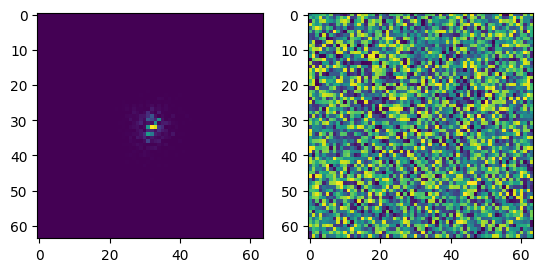

In [49]:

# u1_f = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(u1)))

u1_f = np.fft.fftshift(np.fft.fft2(u1))
factor = 64
zoomStart, zoomStop = u1_f.shape[0]//2-factor//2, u1_f.shape[0]//2+factor//2

# [zoomStart:zoomStop, zoomStart:zoomStop]

focalIntensity = np.abs(u1_f)**2
focalPhase     = np.angle(u1_f)
fig,ax = plt.subplots(1,2)
ax[0].imshow(focalIntensity[zoomStart:zoomStop, zoomStart:zoomStop])
ax[1].imshow(focalPhase[zoomStart:zoomStop, zoomStart:zoomStop])

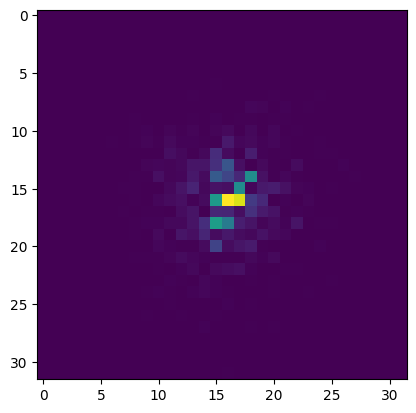

In [43]:
factor = 32
zoomStart, zoomStop = u1_f.shape[0]//2-factor//2, u1_f.shape[0]//2+factor//2
u1_f_zoom = u1_f[zoomStart:zoomStop, zoomStart:zoomStop]

plt.imshow(np.abs(u1_f_zoom)**2)